SMOGN으로 train data[0.5~72]를 조정한 뒤, test data[144]를 얼마나 잘 예측하는지 측정
- 감자율에 대한 불균형을 해소시키게 됨(숫자가 딱 떨어지지 않는 클래스에 대해서만 정리해주는 듯) 
- 결과: 레퍼런스 식만큼 정확하지는 않지만, SMOGN 시키지 않았을 때보다 예측력 좋아짐.(n=2)

우리가 목표로 한 데이터 늘리기를 위해서는 upsampling, interpolation에 대한 방법론이 필요. 또는 기존 레퍼런스 식을 통해 일일이 늘려준다.

레퍼런스 식과 실제 데이터의 차이를 가우시안 분포의 상/하한으로 두는 것은 조금 더 연구 필요.

In [1]:
## 모듈 불러옴
import smogn
import pandas
import seaborn
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

In [2]:
## load data
N33H = pandas.read_excel(
    "data/N33H - time.xlsx", header=1
)
del N33H['Unnamed: 4']
## smogn으로 데이터 가공
N33H_smogn = smogn.smoter(
    
    data = N33H.truncate(after='64',axis=0), 
    y = "감자율"
)

r_index: 100%|##########################################################################| 3/3 [00:00<00:00, 999.99it/s]


In [45]:
## original data 차원
N33H.shape

(80, 4)

In [46]:
N33H

,Pc,온도,시간,감자율
0,2.03,140,0.5,0.98088
1,2.03,160,0.5,0.90991
2,2.03,180,0.5,0.77368
3,2.03,200,0.5,0.60988
4,3.26,140,0.5,0.99062
...,...,...,...,...
75,4.81,200,144.0,0.75330
76,6.69,140,144.0,0.99606
77,6.69,160,144.0,0.97627
78,6.69,180,144.0,0.94345


In [47]:
## 가공된 데이터 차원
N33H_smogn.shape

(50, 4)

In [48]:
N33H_smogn
#N33H_smogn.set_option('display.max_seq_items', None)
#N33H_smogn

,Pc,온도,시간,감자율
2,2.030000,180,0.500000,0.773680
3,2.030000,200,0.500000,0.609880
4,3.260000,140,0.500000,0.990620
5,3.260000,160,0.500000,0.966550
7,3.260000,200,0.500000,0.754230
9,4.810000,160,0.500000,0.976210
11,4.810000,200,0.500000,0.829230
14,6.690000,180,0.500000,0.960540
16,2.030000,140,1.500000,0.975420
17,2.030000,180,1.500000,0.741200


In [49]:
## box plot stats - original data 
smogn.box_plot_stats(N33H['감자율'])['stats']

array([0.60988 , 0.82256 , 0.941445, 0.97803 , 0.99688 ])

In [50]:
## box plot stats - modified data
smogn.box_plot_stats(N33H_smogn['감자율'])['stats']

array([0.53863   , 0.69613684, 0.74816978, 0.925125  , 0.99205   ])

<AxesSubplot:xlabel='감자율', ylabel='Density'>

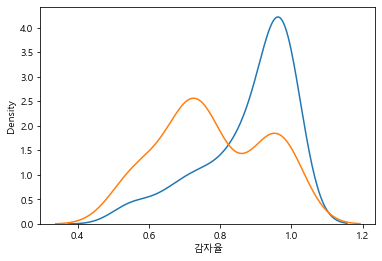

In [51]:
## plot y distribution 
seaborn.kdeplot(N33H['감자율'], label = "Original")
seaborn.kdeplot(N33H_smogn['감자율'], label = "Modified")

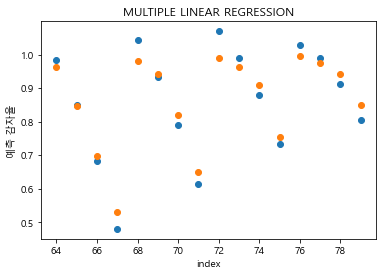

변환 차수 :  2
train cv10 R2:[ 0.99007907  0.97360711  0.95253706  0.7284281   0.97502914  0.83837454
  0.95119367  0.50556072 -0.69567323 -0.04651186]
train cv10 평균점수 : 0.6172624314760143
test set R2:  0.9236418944341513
회귀계수:  [[ 0.00000000e+00 -3.98124956e-02  6.50514554e-03  1.89778287e-03
  -1.11217099e-02  9.99586170e-04  4.58262170e-05 -4.20063456e-05
  -1.84739346e-05  5.28054901e-06]]


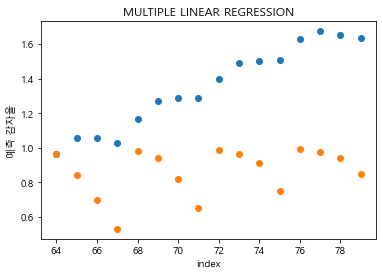

변환 차수 :  3
train cv10 R2:[ 9.84082413e-01  8.75405630e-01  8.42734931e-01 -6.98767361e+00
  8.82816681e-01  1.74972622e-01  5.43148847e-01 -5.19785241e+01
 -3.23571574e+02  1.32037333e-01]
train cv10 평균점수 : -37.81025727894563
test set R2:  -14.564956873698838
회귀계수:  [[ 0.00000000e+00 -2.10444815e-01  1.29413297e-01  6.05659993e-03
   2.94154905e-02  9.80674509e-04  4.00090470e-04 -7.80681189e-04
   9.17927667e-06 -1.78941947e-04  1.51406172e-04 -2.67941797e-04
  -6.63477070e-06  7.21623524e-06 -9.06024567e-06  1.29626402e-05
   1.41929003e-06 -2.27767077e-07  9.34834518e-07  9.91551226e-08]]


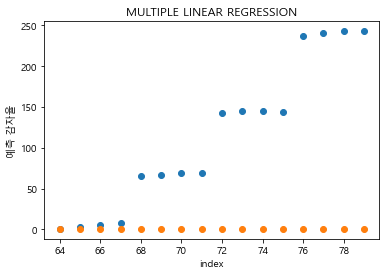

변환 차수 :  4
train cv10 R2:[-1.71630542e+01 -6.85832365e+03 -1.58291859e+00 -8.23639813e+06
 -1.02855318e+02 -1.93954578e+06 -4.92978892e+03 -7.62916732e+07
 -2.40933407e+05 -7.38337980e-02]
train cv10 평균점수 : -8672046.030560251
test set R2:  -1129519.6576011162
회귀계수:  [[-1.96572192e+03 -6.62330847e+01 -8.24134524e+00  6.73876376e-01
   1.75589303e+01  4.58664231e-01 -1.38151818e-01  7.05699174e-02
  -1.14124185e-02  8.29005256e-03 -1.60509717e+00 -9.28871018e-02
  -2.53091395e-02 -9.58161208e-04  2.41448761e-03 -2.19161701e-03
  -2.76980860e-04  4.94505623e-05  3.91982397e-06 -1.29227054e-04
   3.51696357e-02  5.71820475e-03  2.31010655e-03  7.65546327e-05
   5.16483448e-05 -8.64486720e-05  1.15501856e-06 -6.16484223e-06
  -5.93997885e-06  4.00398171e-05  4.07449609e-07 -6.92283209e-08
  -5.67160541e-09  1.02201435e-07  1.38830216e-07]]


C:\Users\SIMBA\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SIMBA\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


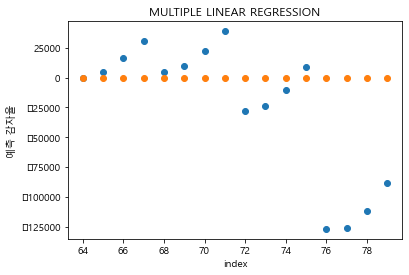

변환 차수 :  5
train cv10 R2:[-1.85208472e+04 -1.15307301e+06 -4.47763777e+00 -1.78270928e+09
 -1.08637331e+06 -6.50253397e+07 -1.08166910e+08 -4.22268130e+11
 -4.56946064e+10 -1.11321982e+00]
train cv10 평균점수 : -46992089570.50489
test set R2:  -196377314587.73465
회귀계수:  [[-4.58527923e-04  2.99991675e-03 -3.42648882e-02  2.57170968e-03
   1.56354232e-02  1.18058328e-01  1.61146639e-02 -2.94836047e+00
   1.21385837e-01  9.64773096e-02  3.55870353e-02  6.49213148e-01
   4.62652162e-02 -1.31765121e-01  6.20977752e-01 -1.14254173e-01
   3.57143205e-02  4.44125928e-03 -1.28563944e-01  2.44127183e-01
  -1.02116781e-02 -1.42286185e-01 -1.86262461e-01  1.98864450e-02
  -2.32441252e-01  8.26819748e-01  7.76854793e-04 -2.84936526e-04
  -2.85328106e-02  1.67302794e-02 -1.60730024e-04 -9.86883309e-05
   1.54795485e-03 -2.24996781e-03 -1.13071079e-03 -7.17321874e-01
   5.14946542e-02  2.50184418e-02 -1.50831885e-04 -5.55929457e-03
   2.21105169e-03 -1.35119853e-04  1.24977004e-03 -1.05668587e-03
  -7.13

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')


x = N33H[['Pc', '온도', '시간']]
y = N33H[['감자율']]

x_smogn = N33H_smogn[['Pc', '온도', '시간']]
y_smogn = N33H_smogn[['감자율']]

def prediction(hyper_degree):
    # 데이터셋 분리
    x_train, _, y_train, _ = train_test_split(x_smogn, y_smogn, train_size=0.8, test_size=0.2, shuffle=False) #smogn 데이터로 학습
    _, x_test, _, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, shuffle=False) #144 예측
    #모델 생성
    model = LinearRegression()

    poly = PolynomialFeatures(degree = hyper_degree) # n차함수 적용
    x_train_poly = poly.fit_transform(x_train) # 데이터를 n차식으로 변형
    x_test_poly = poly.fit_transform(x_test) # 데이터를 n차식으로 변형
    model.fit(x_train_poly, y_train) # model fitting
    
    # K-fold model validation
    arr_score = cross_val_score(model,x_train_poly,y_train,scoring='r2',cv=10)
    
    
    #예측 비교
    y_predict = model.predict(x_test_poly)
    plt.scatter(y_test.index, y_predict)
    plt.scatter(y_test.index, y_test)
    plt.xlabel("index")
    plt.ylabel("예측 감자율")
    plt.title("MULTIPLE LINEAR REGRESSION")
    plt.show()
    
    # test k-fold
    #test_score = cross_val_score(model,x_test_poly, y_test,scoring='r2',cv=5)
    
    print('변환 차수 : ', hyper_degree)
    print(f"train cv10 R2:{arr_score}")
    print(f'train cv10 평균점수 : {arr_score.mean()}')
    #print(f'test cv5 R2: , {test_score}')
    #print(f'test cv5 평균점수: , {test_score.mean()}')
    print("test set R2: ", model.score(x_test_poly, y_test))
    print("회귀계수: ", model.coef_)
    

# n차항 출력
for i in range(2,6):
    prediction(i)
#prediction(2)

변환 차수 :  2

train cv10 R2:[0.93902697 0.98181308 0.9888281  0.98511989 0.99272885 0.98435874
 0.94021461 0.94586292 0.55561959 0.1968244 ]
 
train cv10 평균점수 : 0.8510397147952238

test set R2:  0.747539884733013

회귀계수:  [[ 0.00000000e+00 -6.99970008e-02  1.15702171e-02 -9.24408860e-05
  -8.44446071e-03  1.02422794e-03  1.98517666e-04 -5.80736238e-05
  -1.00742846e-05  8.20520392e-06]]

변환 차수 :  2

train cv10 R2:[ 0.96883344  0.76904547  0.98178657  0.99776899  0.97876112  0.98206659
  0.98160373  0.99126804  0.58257587 -0.302065  ]
  
train cv10 평균점수 : 0.7931644815161644

test set R2:  0.8327384806884093

회귀계수:  [[ 0.00000000e+00 -7.18260866e-02  1.40671612e-02 -6.50170958e-04
  -8.66535018e-03  1.03289094e-03  1.56824200e-04 -6.55116319e-05
  -6.88416890e-06  9.16936363e-06]]

변환 차수 :  2

train cv10 R2:[0.94314702 0.86974588 0.98337486 0.99840291 0.96963813 0.96924082
 0.89050382 0.96364841 0.96049846 0.32138579]
 
train cv10 평균점수 : 0.8869586082006353

test set R2:  0.8887917648789255

회귀계수:  [[ 0.00000000e+00 -6.57717149e-02  1.23735773e-02 -5.15175866e-04
  -7.68672656e-03  9.91450925e-04  9.97923099e-05 -6.03049483e-05
  -7.80852567e-06  9.78647117e-06]]